In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Master_Loan_Summary.csv")
data = data[data["data_source"] == "Lending Club"]
data.drop('data_source',axis=1, inplace=True)

c:\users\jorge\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data = pd.read_csv("Loans.csv")

In [3]:
for cols in data.columns:
    print(cols)
    print(data[cols].value_counts())

Unnamed: 0
2047      1
274988    1
283168    1
285217    1
279074    1
         ..
105830    1
103783    1
126312    1
124265    1
0         1
Name: Unnamed: 0, Length: 1961527, dtype: int64
loan_number
4196351      1
77645483     1
2377339      1
115418775    1
78539698     1
            ..
66474903     1
66464664     1
91628441     1
125189018    1
75497472     1
Name: loan_number, Length: 1961527, dtype: int64
amount_borrowed
10000.0    154829
20000.0    110439
12000.0    107099
15000.0    105367
35000.0     76612
            ...  
38125.0         3
38550.0         3
38775.0         3
37050.0         2
38350.0         2
Name: amount_borrowed, Length: 1561, dtype: int64
term
36    1400467
60     561060
Name: term, dtype: int64
borrower_rate
0.1199    53338
0.0532    47171
0.1099    43194
0.1399    42771
0.1149    31171
          ...  
0.1477        2
0.1690        1
0.1428        1
0.1750        1
0.1319        1
Name: borrower_rate, Length: 356, dtype: int64
installment
301.15     4

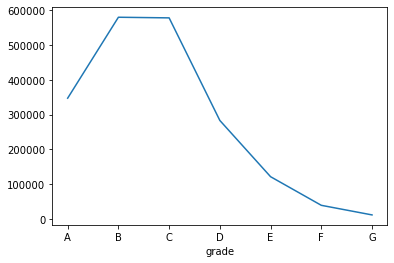

In [4]:
grade = data.groupby("grade").count()["borrower_rate"]

grade.plot()
plt.show()

In [3]:
data.head()

,Unnamed: 0,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description
0,0,10149342,27050.0,36,0.1099,885.46,B,2013-12-01T00:00,debt_consolidation,0.0,27050.0,4702.53,0.0,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED
1,1,10149488,4800.0,36,0.1099,157.13,B,2013-12-01T00:00,home_improvement,0.0,4800.0,357.52,0.0,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED
2,2,10148122,12000.0,36,0.0762,373.94,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1397.54,0.0,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED
3,3,10119623,12000.0,36,0.1199,398.52,B,2013-12-01T00:00,debt_consolidation,0.0,12000.0,2346.48,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED
4,4,10159498,12000.0,36,0.0662,368.45,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1263.95,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_number                  int64  
 1   amount_borrowed              float64
 2   term                         int64  
 3   borrower_rate                float64
 4   installment                  float64
 5   grade                        object 
 6   origination_date             object 
 7   listing_title                object 
 8   principal_balance            float64
 9   principal_paid               float64
 10  interest_paid                float64
 11  late_fees_paid               float64
 12  debt_sale_proceeds_received  float64
 13  last_payment_date            object 
 14  next_payment_due_date        object 
 15  days_past_due                int64  
 16  loan_status_description      object 
 17  data_source                  object 
dtypes: float64(8), int64(3), object(7)
memory 

In [5]:
data.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06
mean,5.076601e+07,1.447258e+04,4.294869e+01,1.382498e-01,4.335797e+02,4.944927e+03,8.433969e+03,2.214817e+03,2.622497e+00,7.711331e+01,7.390529e+01
std,4.813839e+07,8.763608e+03,1.089006e+01,5.515687e-02,2.565165e+02,7.528232e+03,7.940062e+03,2.430349e+03,2.124300e+01,5.337221e+02,2.221053e+02
min,5.571600e+04,1.000000e+03,1.200000e+01,5.310000e-02,4.930000e+00,0.000000e+00,-1.500000e+01,-8.255100e+00,-9.500000e-09,0.000000e+00,0.000000e+00
25%,8.654122e+05,8.000000e+03,3.600000e+01,9.920000e-02,2.481491e+02,0.000000e+00,2.250702e+03,6.334700e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.516220e+07,1.200000e+04,3.600000e+01,1.299000e-01,3.732400e+02,0.000000e+00,6.000000e+03,1.425910e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.391978e+07,2.000000e+04,6.000000e+01,1.677000e-01,5.718100e+02,7.973770e+03,1.200000e+04,2.891568e+03,0.000000e+00,0.000000e+00,6.000000e+01
max,1.360671e+08,4.000000e+04,6.000000e+01,3.192000e-01,2.251506e+03,4.000000e+04,4.000000e+04,2.788480e+04,1.676850e+03,3.985955e+04,2.402000e+03


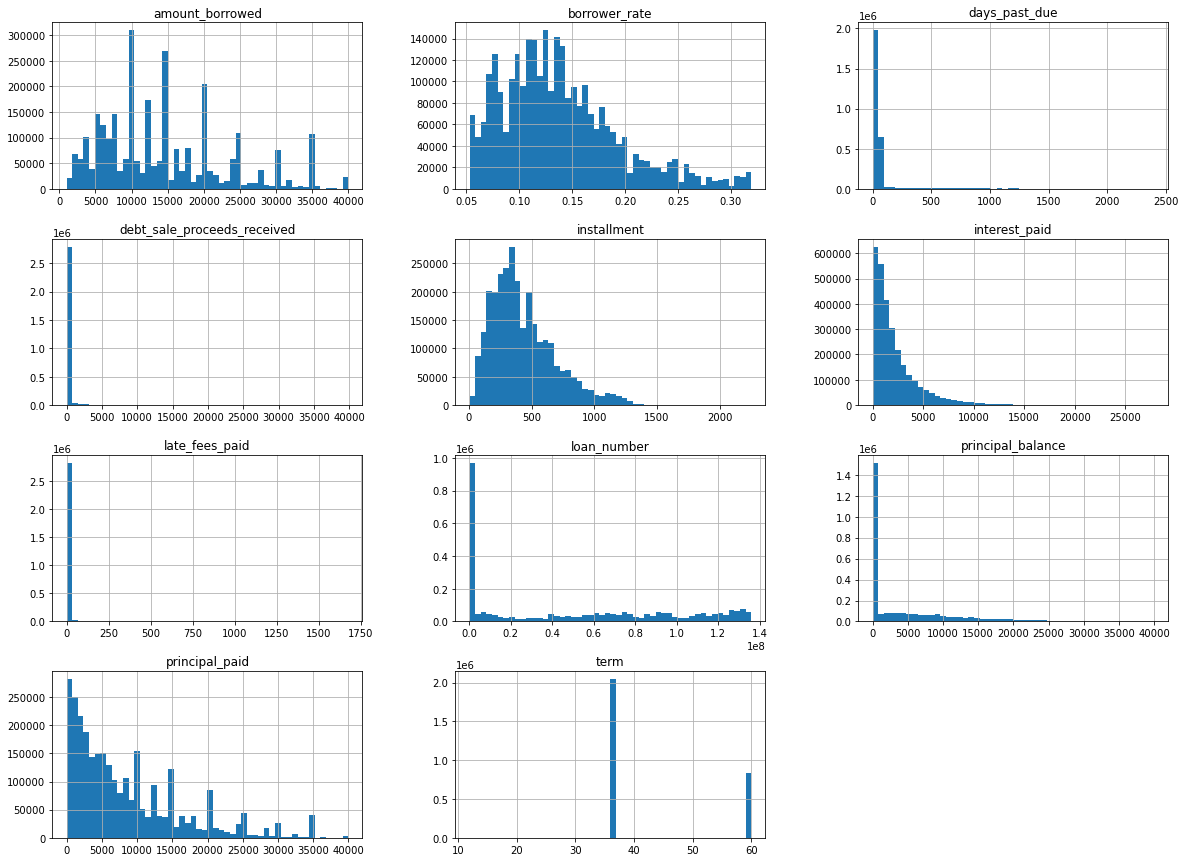

In [7]:
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

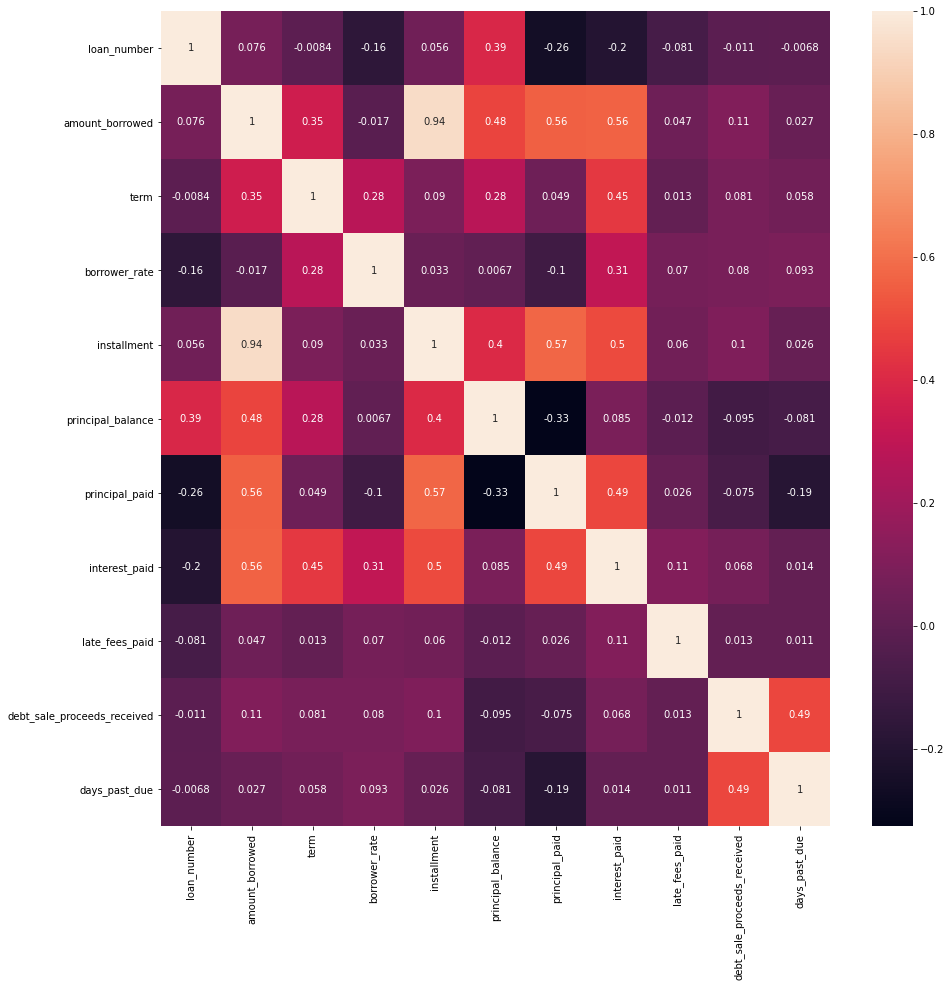

In [9]:
corrMatrix  = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)


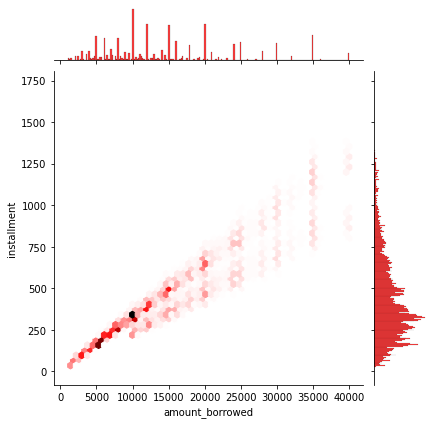

In [10]:
sns.jointplot(x = "amount_borrowed", y = "installment", data=data, color='red', kind="hex")

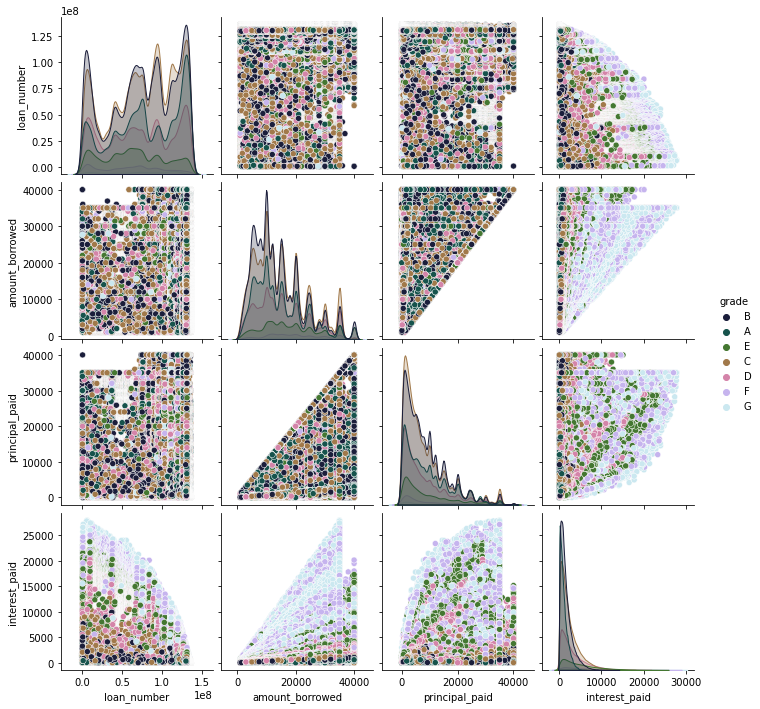

In [8]:
#pd.plotting.scatter_matrix(data[["loan_number","amount_borrowed","principal_paid","interest_paid"]], alpha=0.2)
df = data[["loan_number","amount_borrowed","principal_paid","interest_paid","grade"]]
sns.pairplot(df, hue="grade", palette='cubehelix')

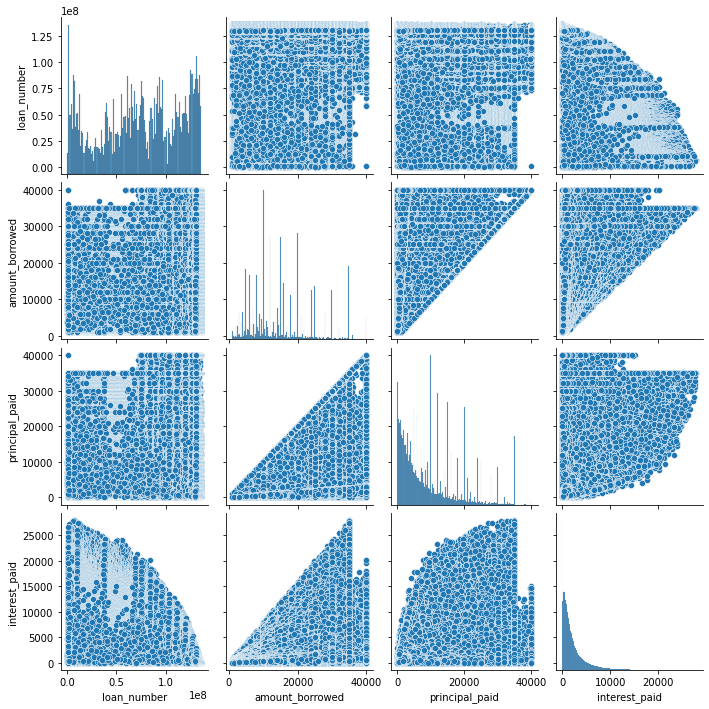

In [14]:
df = data[["loan_number","amount_borrowed","principal_paid","interest_paid","grade"]]
sns.pairplot(df, palette='cubehelix')

<AxesSubplot:xlabel='amount_borrowed', ylabel='term'>

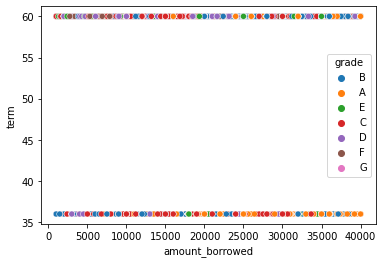

In [11]:
sns.scatterplot(data=data,x="amount_borrowed",y="term", hue = "grade")

<AxesSubplot:xlabel='interest_paid', ylabel='amount_borrowed'>

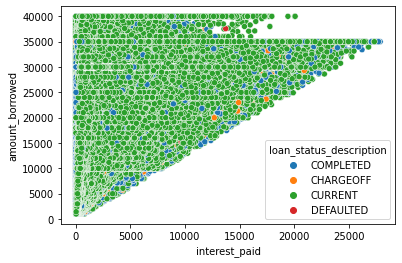

In [12]:
sns.scatterplot(data=data,x="interest_paid",y="amount_borrowed", hue = "loan_status_description")

In [58]:
df = data.groupby(["listing_title"])["loan_number"].count()/data["loan_number"].count()*100
df

listing_title
car                    1.035163
credit_card           22.492222
debt_consolidation    56.980251
educational            0.000102
home_improvement       6.719357
house                  0.616815
major_purchase         2.217252
medical                1.215176
moving                 0.679878
other                  6.170703
renewable_energy       0.061126
small_business         1.055453
vacation               0.687628
wedding                0.068875
Name: loan_number, dtype: float64

In [81]:
di = df[df>0.5]
di

listing_title
car                    1.035163
credit_card           22.492222
debt_consolidation    56.980251
home_improvement       6.719357
house                  0.616815
major_purchase         2.217252
medical                1.215176
moving                 0.679878
other                  6.170703
small_business         1.055453
vacation               0.687628
Name: loan_number, dtype: float64

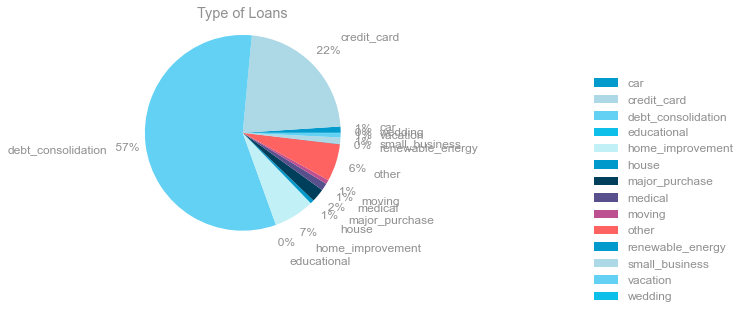

In [77]:
fig, ax = plt.subplots()

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC','#003f5c', '#58508d',
                      '#bc5090', '#ff6361', '#ffa600']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

labels = df.keys()
percentages = [i for i in df]
explode=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:10], autopct='%3.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Type of Loans")
ax.legend(frameon=False, bbox_to_anchor=(2.0,0.8))

In [49]:
df = data.groupby(["loan_status_description"])["loan_number"].count()/data["loan_number"].count()*100
df

loan_status_description
CHARGEOFF    10.348723
COMPLETED    40.220961
CURRENT      49.365163
DEFAULTED     0.065153
Name: loan_number, dtype: float64

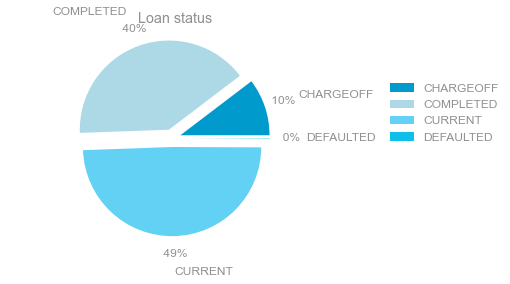

In [54]:
fig, ax = plt.subplots()

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

labels = df.keys()
percentages = [i for i in df]
explode=(0.1, 0.1, 0.1, 0.1)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:4], autopct='%3.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Loan status")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))